## Overlap
Let's study recall under overlap conditions

In [1]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set(font_scale=3.0)

In [2]:
from network import MinaNetwork

## Two orthogonal patterns

In [3]:
### Structure paramters
N_input = 200  # Inputs size
N_recurrent = 200  # C3 size
v = 21.0   # Input - C3 connection
b = 21.0   # Input - C1 connection
Kr = 0.0   # Recurrent self-inhibition gain
Ki = 1.0  # Input - C3 inhibition
Ci = 1.0  # Inhibition from the input to C1
Cr = 0.5  # Inhibition from C3 to C1
p = 1.0   # Sparness parameter

# Dynamical parameters
theta = 0.0
phi = 0

# Training parameters
training_time = 100
epsilon = 0.1

# Instantiate the network
nn = MinaNetwork(n_input=N_input, n_recurrent=N_recurrent, p=p, v=v, b=b, Ki=Ki, Kr=Kr, Ci=Ci, Cr=Cr,
                 theta=theta, phi=phi, uniform_w=False)

# Build the patterns
number_of_patterns = 20
sparsity = 5.0
nn.build_patterns_dictionary(number_of_patterns=number_of_patterns, sparsity=sparsity)

In [4]:
# Training
sequence1 = [0, 1, 2, 3, 4]
sequence2 = [8, 9, 10, 11, 12]
epsilon = 0.1
training_time = 200

nn.train_network(epsilon=epsilon, training_time=training_time, sequence=sequence1)
nn.train_network(epsilon=epsilon, training_time=training_time, sequence=sequence2)

{}

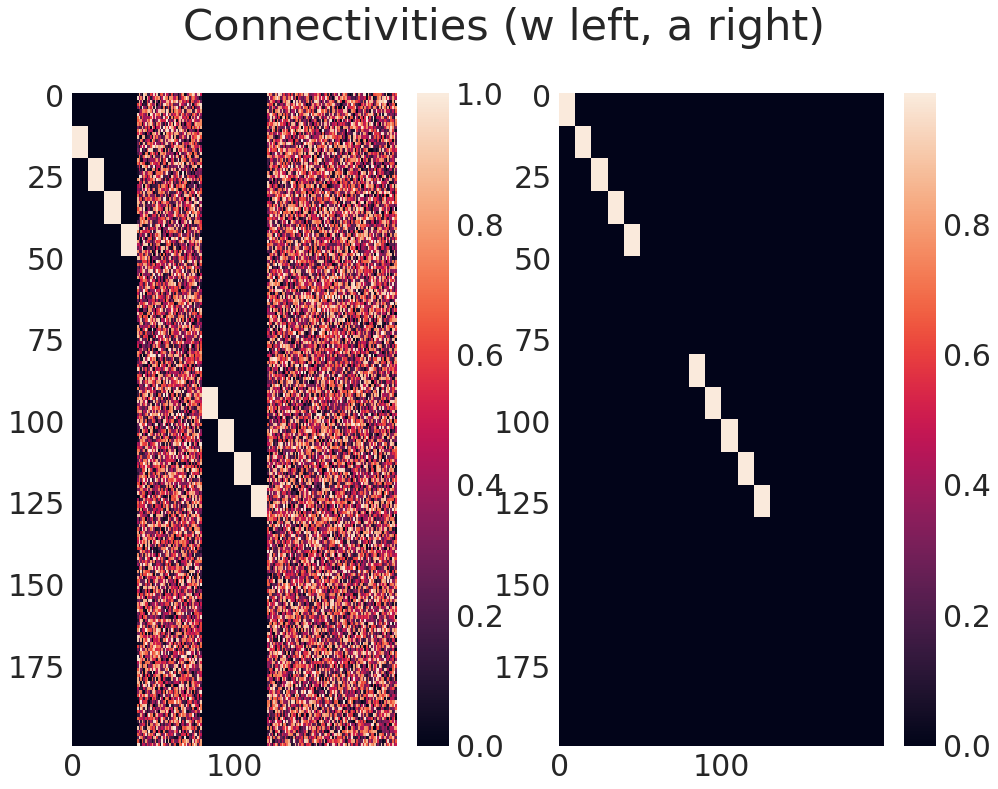

In [5]:
fig = plt.figure(figsize=(16, 12))

fig.suptitle('Connectivities (w left, a right)')

ax1 = fig.add_subplot(121)
im1 = ax1.imshow(nn.w, aspect='auto')
ax1.grid()

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(nn.a, aspect='auto')
ax2.grid()

fig.colorbar(im1, ax=ax1);
fig.colorbar(im2, ax=ax2);

#### Recall
Now let's check the recall

In [6]:
cue =sequence1[0]
recall_time = 8

recall_history = nn.recall(recall_time, cue)

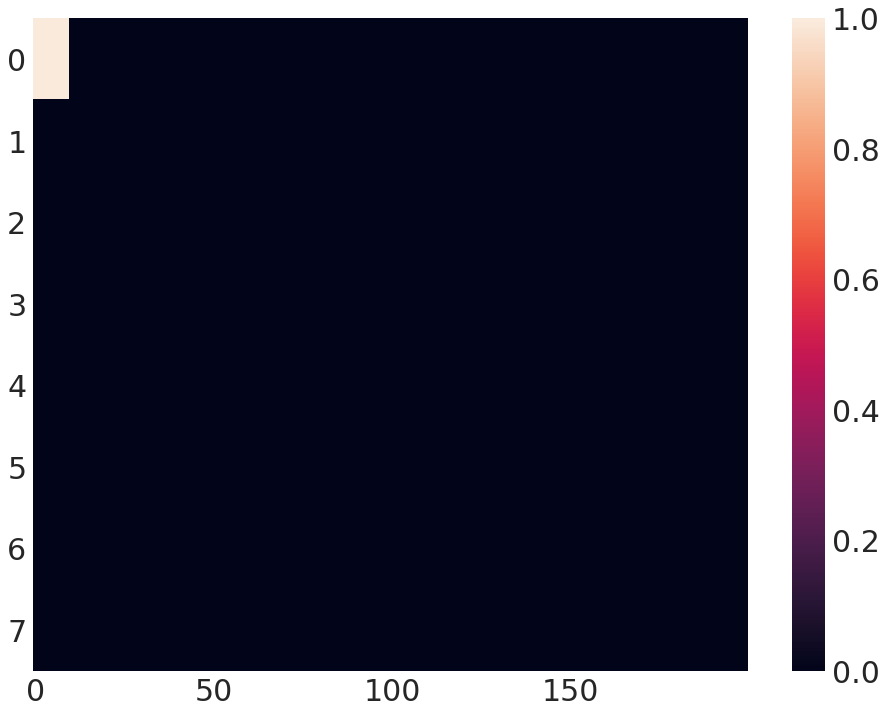

In [7]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
im = ax.imshow(recall_history, aspect='auto')

ax.grid()

fig.colorbar(im, ax=ax);

In [8]:
cue = sequence2[0] 
recall_time = 8

recall_history = nn.recall(recall_time, cue)

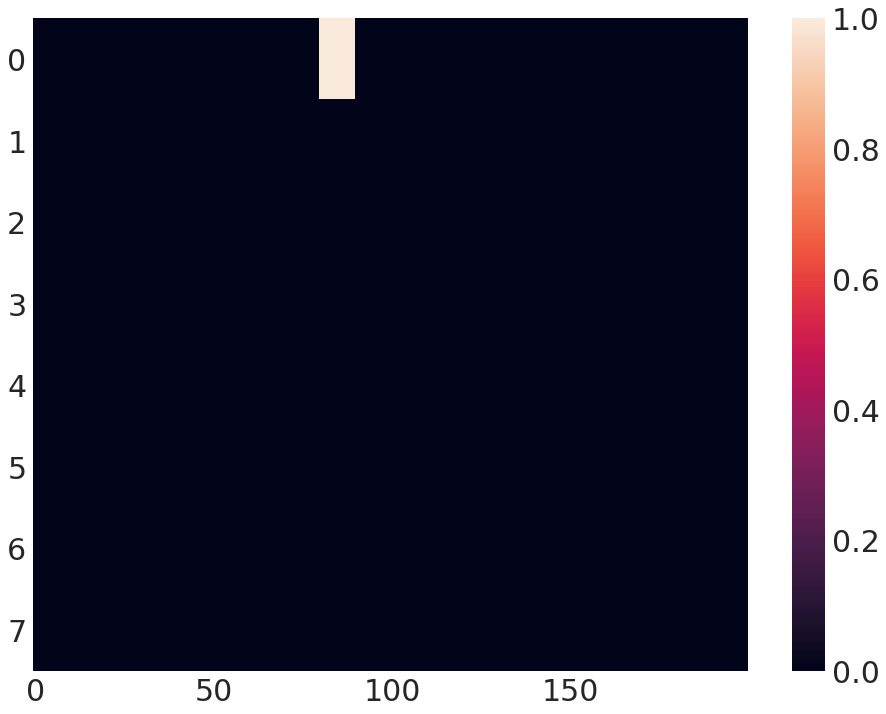

In [9]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
im = ax.imshow(recall_history, aspect='auto')

ax.grid()

fig.colorbar(im, ax=ax);

## Overlap

#### 0 overlap

In [10]:
### Structure paramters
N_input = 200  # Inputs size
N_recurrent = 200  # C3 size
v = 21.0   # Input - C3 connection
b = 21.0   # Input - C1 connection
Kr = 0.5   # Recurrent self-inhibition gain
Ki = 1.0  # Input - C3 inhibition
Ci = 1.0  # Inhibition from the input to C1
Cr = 0.5  # Inhibition from C3 to C1
p = 1.0   # Sparness parameter

# Dynamical parameters
theta = 0.0
phi = 0

# Training parameters
training_time = 100
epsilon = 0.1

# Instantiate the network
nn = MinaNetwork(n_input=N_input, n_recurrent=N_recurrent, p=p, v=v, b=b, Ki=Ki, Kr=Kr, Ci=Ci, Cr=Cr,
                 theta=theta, phi=phi, uniform_w=False)

# Build the patterns
number_of_patterns = 20
sparsity = 5.0
nn.build_patterns_dictionary(number_of_patterns=number_of_patterns, sparsity=sparsity)

In [11]:
# Training
sequence1 = [ 0,  1,  2,  3,  4,  5,  6,  7]
sequence2 = [12, 13, 14, 15, 16, 17, 18, 19]
epsilon = 0.1
training_time = 200

nn.train_network(epsilon=epsilon, training_time=training_time, sequence=sequence1)
nn.train_network(epsilon=epsilon, training_time=training_time, sequence=sequence2);

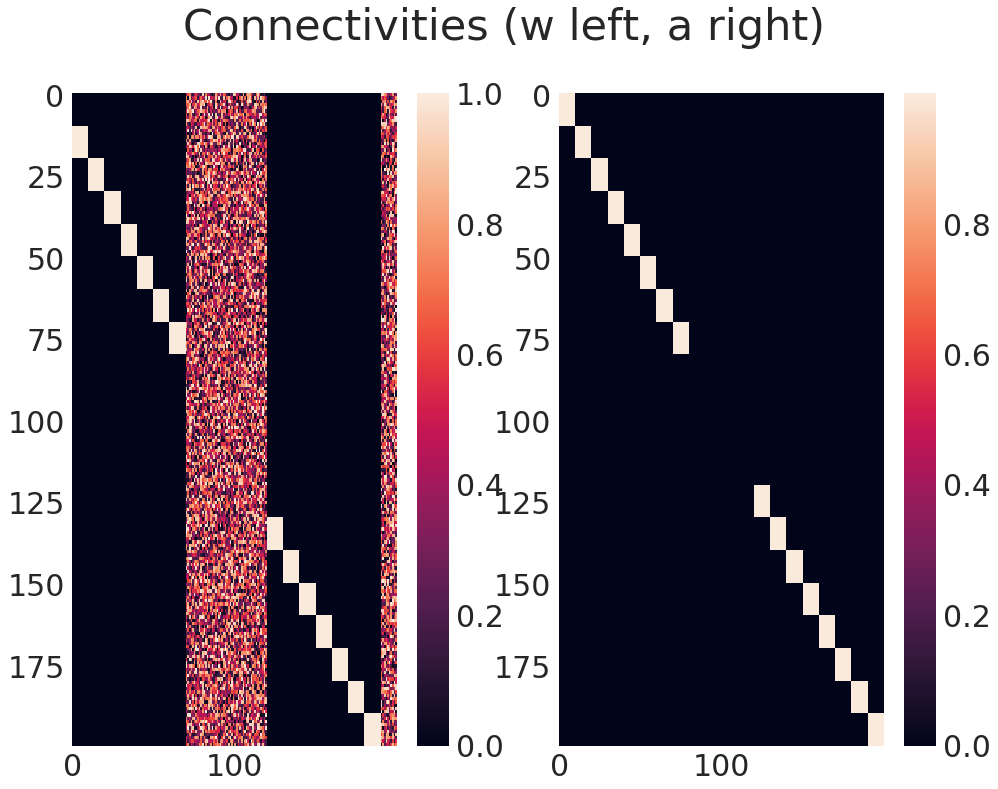

In [12]:
fig = plt.figure(figsize=(16, 12))

fig.suptitle('Connectivities (w left, a right)')

ax1 = fig.add_subplot(121)
im1 = ax1.imshow(nn.w, aspect='auto')
ax1.grid()

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(nn.a, aspect='auto')
ax2.grid()

fig.colorbar(im1, ax=ax1);
fig.colorbar(im2, ax=ax2);

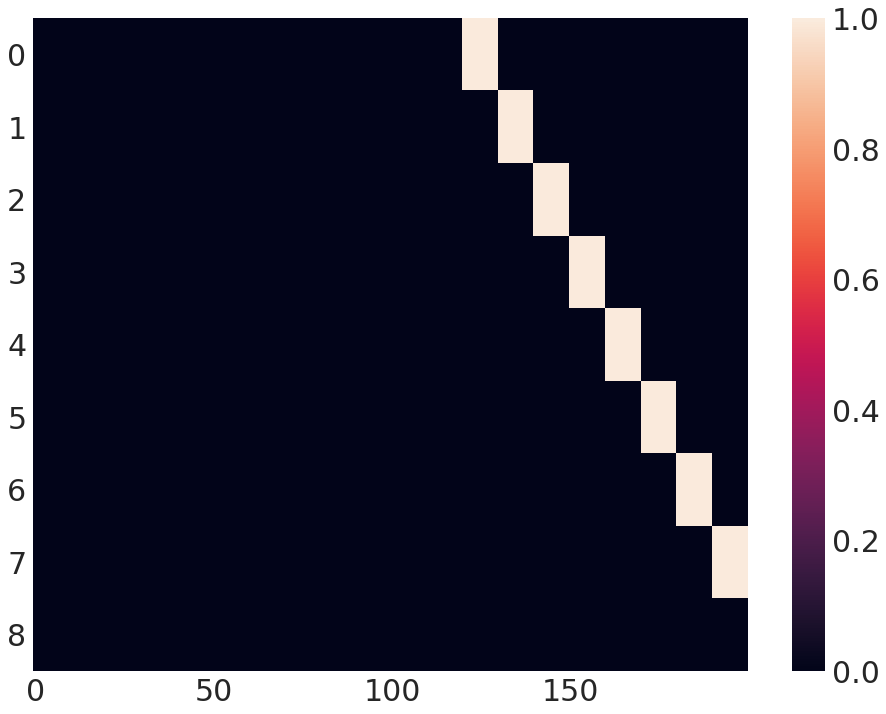

In [13]:
sequence = sequence2
cue = sequence[0] 
recall_time = len(sequence) + 1

recall_history = nn.recall(recall_time, cue)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
im = ax.imshow(recall_history, aspect='auto')

ax.grid()

fig.colorbar(im, ax=ax);

#### 1 Overlap

In [14]:
### Structure paramters
N_input = 200  # Inputs size
N_recurrent = 200  # C3 size
v = 21.0   # Input - C3 connection
b = 21.0   # Input - C1 connection
Kr = 0.01   # Recurrent self-inhibition gain
Ki = 1.0  # Input - C3 inhibition
Ci = 1.0  # Inhibition from the input to C1
Cr = 0.01  # Inhibition from C3 to C1
p = 1.0  # Sparness parameter

# Dynamical parameters
theta = 0.0
phi = 0

# Training parameters
training_time = 100
epsilon = 0.1

# Instantiate the network
nn = MinaNetwork(n_input=N_input, n_recurrent=N_recurrent, p=p, v=v, b=b, Ki=Ki, Kr=Kr, Ci=Ci, Cr=Cr,
                 theta=theta, phi=phi, uniform_w=False)

# Build the patterns
number_of_patterns = 20
sparsity = 5.0
nn.build_patterns_dictionary(number_of_patterns=number_of_patterns, sparsity=sparsity)

# Training
sequence1 = [ 0,  1,  9,  2,  3,  4,  5,  6]
sequence2 = [12, 13, 9, 14, 15, 16, 17, 18]
epsilon = 0.1
training_time = 200
pre_synaptic_rule = True

nn.train_network(epsilon=epsilon, training_time=training_time, sequence=sequence1, pre_synaptic_rule=pre_synaptic_rule)
nn.train_network(epsilon=epsilon, training_time=training_time, sequence=sequence2, pre_synaptic_rule=pre_synaptic_rule);

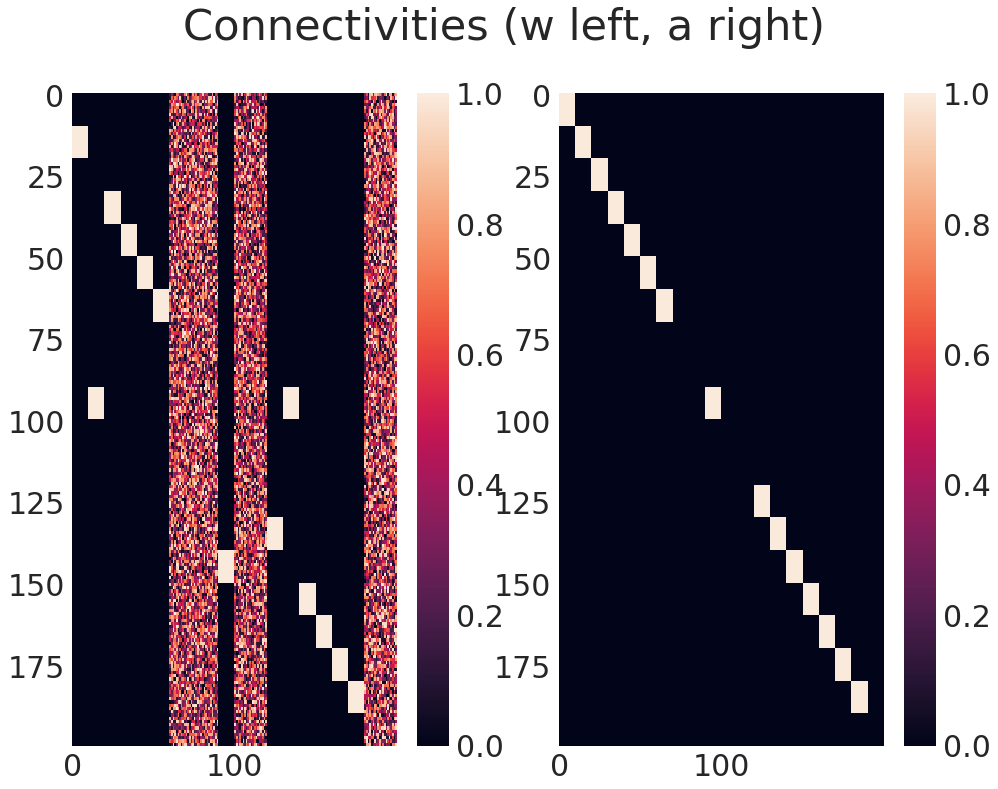

In [15]:
fig = plt.figure(figsize=(16, 12))

fig.suptitle('Connectivities (w left, a right)')

ax1 = fig.add_subplot(121)
im1 = ax1.imshow(nn.w, aspect='auto')
ax1.grid()

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(nn.a, aspect='auto')
ax2.grid()

fig.colorbar(im1, ax=ax1);
fig.colorbar(im2, ax=ax2);

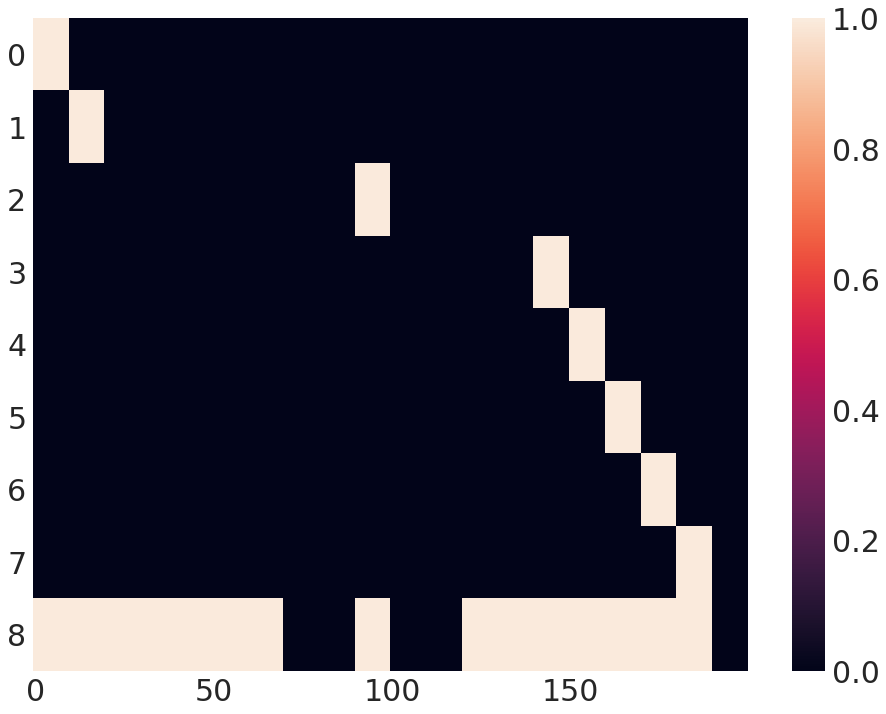

In [16]:
sequence = sequence1
cue = sequence[0] 
recall_time = len(sequence) + 1

recall_history = nn.recall(recall_time, cue)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
im = ax.imshow(recall_history, aspect='auto')

ax.grid()

fig.colorbar(im, ax=ax);